In [16]:
import pandas as pd
data = pd.read_csv("AirPassengers.csv")
data.head()

,Travel date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [17]:
data.shape

(144, 2)

In [18]:
# Changing the datatype of Travel date
data['Travel date'] = pd.to_datetime(data['Travel date'])
data.dtypes

Travel date    datetime64[ns]
Passengers              int64
dtype: object

In [19]:
# Making Travel date as Index and dropping current column to change the frequency
data.index = data['Travel date']
data.drop(['Travel date'], axis=1, inplace=True)

In [23]:
# Changing frequency from daily to month end and getting the mean passenger for each month
data.resample('M').mean().head()
# Note - M is one of the DateOffset object provided by Pandas. 


,Passengers
Travel date,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [24]:
import numpy as np

In [26]:
pd.DataFrame(np.array([1,2,3,4,5]), columns=['values'], index = pd.date_range(start= '1/1/2010', end = '1/5/2010',freq='D'))

,values
2010-01-01,1
2010-01-02,2
2010-01-03,3
2010-01-04,4
2010-01-05,5


In [ ]:
# sorting dataframe based on date index
# unordered_data.sort_index(inplace=True)
# unordered_data

Now that we can identify time series data, let us see some formal definition.

Time series is defined as 'a series of data points listed (or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.'

Time series data is represented by:

yt= y(t-1)+ εt

where 'yt' is the observed value at time 't'

'εt' is the error at time 't'

Time series analysis is defined as 'methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.' (Source: Wikipedia)

 

Time series data has to be a stationary series to perform time series analysis. Let us understand what a stationary series is.

A stationary series exhibits the following characteristics:

mean is constant

variance is constant

co-variance is constant

Performing time series analysis on a non-stationary series will result in inaccurate predictions. Let us see few examples of stationary and non-stationary series.

Analyzing the past data can be done by keeping in mind the following factors: 

Trend: show a long term increase or decrease in data

Seasonal: when the data is affected by seasonal factors

Cyclic: data shows fluctuations across any period of time

Random: If the above 3 components are missing in a data



In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

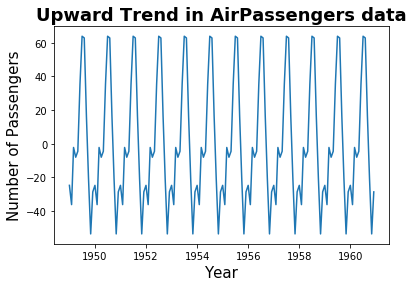

In [31]:
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


# Another way to load a time series data by defining a date format
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)


# Visualizing trend of Airpassengers data
plt.plot(seasonal_decompose(AirPassenger).seasonal)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Upward Trend in AirPassengers data', weight='bold', fontsize=18)
plt.show()


In [35]:
seasonal_decompose(AirPassenger).seasonal

,Passengers
Travel date,
1949-01-01,-24.748737
1949-02-01,-36.188131
1949-03-01,-2.241162
1949-04-01,-8.036616
1949-05-01,-4.506313
1949-06-01,35.402778
1949-07-01,63.830808
1949-08-01,62.823232
1949-09-01,16.520202


We can improve the accuracy of our predictions by breaking down the effect that the factors have on the data. The four factors, trends, seasonal, cyclic and random can be extracted with the help of the decomposition models. The models are used to describe these four factors in a time series data. This will help us identify patterns in the data and will lead us to accurate prediction.

There are basically two decomposition models.

Additive model is used when seasonal variations are relatively constant over time

Multiplicative model is used when seasonal variations increase or decrease over time

Additive model can be used to understand the seasonal effects on the data when the variations are relatively constant. The time series data may be decomposed as follows:

 Time Series Data = (Seasonal) + (Trends) + (Random)

Before proceeding with the decomposition of the data, we need to define the seasonal span by setting the frequency.

For example, if the data is in terms of years then you can set the year-end frequency by dateoffset 'A'. Similarly, for quarter end you can use 'Q'.

In [36]:
# Load fresh data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)


# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
AP_reshaped = pd.DataFrame(AirPassenger.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_reshaped

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [37]:
# Extracting the seasonal values
seasonal_data = np.round(seasonal_decompose(AirPassenger, model='additive').seasonal, 2)
# Getting output corresponding to each month
AP_season = pd.DataFrame(seasonal_data.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_season


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1950,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1951,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1952,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1953,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1954,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1955,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1956,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1957,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1958,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62


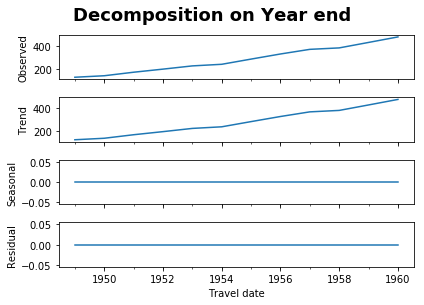

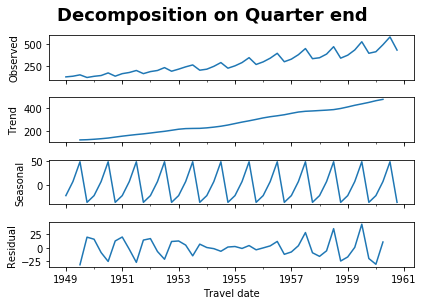

In [38]:
# Decomposition of Airpassengers data on year end taking mean of monthly values
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='additive').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()
# Decomposition of Airpassengers data on quarter end taking mean of monthly values
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='additive').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()


In [39]:
# Deseasonalized data
AP_deseasonalized = AP_reshaped - AP_season
AP_deseasonalized


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,136.75,154.19,134.24,137.04,125.51,99.6,84.17,85.18,119.48,139.64,157.59,146.62
1950,139.75,162.19,143.24,143.04,129.51,113.6,106.17,107.18,141.48,153.64,167.59,168.62
1951,169.75,186.19,180.24,171.04,176.51,142.6,135.17,136.18,167.48,182.64,199.59,194.62
1952,195.75,216.19,195.24,189.04,187.51,182.6,166.17,179.18,192.48,211.64,225.59,222.62
1953,220.75,232.19,238.24,243.04,233.51,207.6,200.17,209.18,220.48,231.64,233.59,229.62
1954,228.75,224.19,237.24,235.04,238.51,228.6,238.17,230.18,242.48,249.64,256.59,257.62
1955,266.75,269.19,269.24,277.04,274.51,279.6,300.17,284.18,295.48,294.64,290.59,306.62
1956,308.75,313.19,319.24,321.04,322.51,338.6,349.17,342.18,338.48,326.64,324.59,334.62
1957,339.75,337.19,358.24,356.04,359.51,386.6,401.17,404.18,387.48,367.64,358.59,364.62
1958,364.75,354.19,364.24,356.04,367.51,399.6,427.17,442.18,387.48,379.64,363.59,365.62


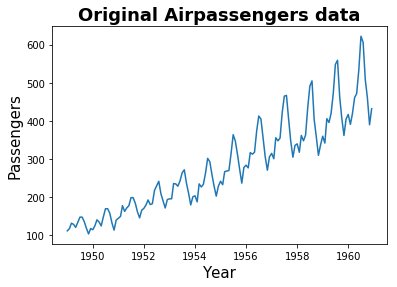

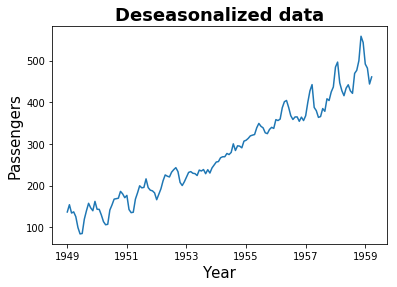

In [40]:
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()
# Melting the data by forming it to a 1D data to proceed with visualization
plt.plot(pd.melt(AP_deseasonalized.T).value)
plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(AP_deseasonalized.T).variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()


In [41]:
import numpy as np

In [46]:
np.arange(1, 133).reshape(-1, 1)

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      